![Universidad de Sonora](http://www.identidadbuho.uson.mx/assets/letragrama-rgb-72.jpg)
## Ciencias de la Computación
### [Curso de Redes Neuronales](https://curso-redes-neuronales-unison.github.io/Temario/)

# Una sola neurona lineal

[**Julio Waissman Vilanova**](http://mat.uson.mx/~juliowaissman/), 24 de agosto de 2017.

En esta libreta vamos a revisar los aspectos básicos del aprendizaje para una sola neurona de salida lineal, sin capas ocultas y usando el criterio de pérdida MSE. El algoritmo es muy simple pero es importante tener claro lo que se requiere antes de pasar a cosas más complicadas.

Empecemos por inicializar los modulos que vamos a requerir.

In [ ]:
#bloque 1

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 1. Un ejemplo en una sola dimensión

Una función muy importante para poder realizar aprendizaje máquina es la capacidad de poder manejar, cargar y guardar datos. en esta libreta vamos a empezar con lo más básico: leer datos desde un archivo texto (o un archivo.cvs). Más adelante revisaremos como recoectar datos de internet, de archivos tipo excel o de bases de datos.

*Numpy* cuenta con varios métodos para leer y guardar datos. La más utilizada para cargar datos provenientes de un archivo de texto es `loadtxt`. Para obtener la documentación de la función, simplemente ejecuta la celda siguiente: 

In [ ]:
np.loadtxt?

Es importante ver que esta función directamente carga los datos existentes en el archivo en un `ndarray`. ¿Y si tenemos uno o varios `ndarrays` con las cosas que hemos desarrollado y los queremos guardar en disco (por ejemplo el vector $\omega$ de parámetros)? 

Vamos a abrir y a visualizar unos datos que se encuentran en el archivo `carretas.txt` (abrelos con un editor de texto si quieres ver el archivo original). En este archivo se tiene las ganancias anuales (en dolares) de unos tacos de carreta (bueno, su equivalente gringo) respecto al tamaño de la ciudad donde se encuentra la carreta. Estos datos provienen de el curso de *Machine learning* de *coursera* de *Andrew Ng*.


In [ ]:
#bloque 2

# Lee los datos en un nd array llamado datos
datos = np.loadtxt('datos/carretas.txt', comments='%', delimiter=',')

# Separa los datos de entrada de los de salida.
# si decimos que x = datos[:,0], pues se toma solo una columna de datos,
# por lo que x sería un ndarray de forma (shape) (96,). Al decir x = datos[:, 0:1] 
# significa que vamos a tomar todas las columnas de 0 a una antes de 1, por lo
# que x tiene una forma (96, 1). Para nuestros intereses, es mejor manejar x xomo una matriz
# de una sola columna que como un vector de una dimensión (igual para y).
x, y = datos[:,0:1], datos[:,1:] 


# T es el número de instancias y n el de atributos
T, n = x.shape

plt.plot(x, y, 'rx')
plt.title(u'Ganancias anuales de una carreta de acuerdo al tamaño de una ciudad')
plt.xlabel(r"Poblaci$\'o$n ($\times 10^4$ habitantes)")
plt.ylabel(r'Beneficios ($\times 10^4$ dolares)')


Listo, ya temos los datos. La hipótesis que hacemos es que el valor de salida lo podemos estimar como

$$
\hat{y}^{(i)} = h_\omega(x^{(i)}) = \omega_0 + \omega_1 x^{(i)}
$$

por lo que, para poder hacer el aprendizaje en forma eficiente, es necesario ajustar la matriz de datos de entrada (en este caso con una sola columna) agregándole una columna de puros unos. 

In [ ]:
#bloque 3

x = np.c_[np.ones_like(x), x]
#print(x)

El criterio MSE como función de pérdida es el de minimizar el costo definido como
$$
Loss(y, \hat{y}) = \frac{1}{2T} \sum_{i = 1}^T (y^{(i)} - \hat{y}^{(i)})^2.
$$

Por lo tanto, para saber si estamos minimizando o no, debemos ser capaces de medir la función de pérdida. 

**Desarrolla la función de pérdida tal como se pide abajo**

In [ ]:
#bloque 4

def mse_loss(x, y, w):
    """
    Calcula el costo de acuerdo al criterio de MSE (mean square error) asumiendo un conjunto de datos
    x, con una salida y, y una hipótesis lineal parametrizada por omega
    
    @param x: Un ndarray de dimension (T, n + 1)
    @param y: Un ndarray de dimensión (T, 1)
    @param w: Un ndarray de dimensión (n + 1, 1)
    
    @return: Un número real con el costo
    """
    T, n = x.shape[0], x.shape[1] - 1
    
    # Puedes hacerlo directamente en forma matricial
    error = (x.dot(w)-y)**2
        
    return np.sum(error)/(2*T)
    


y para probar si está bien el programa, si calculamos $Loss(y, \hat{y})$ para $\omega = (0, 0)^T$ debe de dar (para este conjunto de datos) **32.07**.

In [ ]:
#bloque 5

w = np.zeros([n + 1, 1])
print("x, ",x.shape)
print("La pérdida es {}".format(mse_loss(x, y, w)))

Muy bien, ya podemos calcular el criterio a optimizar (la función de pérdida). Vamos entonces a utilizar la función que acabamos de hacer para ver sus valores para diferentes valores de $\omega$.

In [ ]:
#bloque 6

# Definimos una función que depende solo de omega0 y omega1
def costo_w(w0, w1):
    return mse_loss(x, y, np.array([[w0], [w1]]))

# Y ahora la convertimos en una función tipo numpy (aplica para cualquier entrada de ndarrays)
costo_vect = np.frompyfunc(costo_w, 2, 1)

#Ahora generamos la lista de valores para graficar
w0 = np.linspace(-10, 10, 100);
w1 = np.linspace(-1, 4, 100);

# Y los convertimos en matrices utilizando la función meshgrid
w0, w1 = np.meshgrid(w0, w1)

# Y calculamos los costos para cada par de theta0 y theta 1 con nuestra nueva funcion de costos vectorizada
J = costo_vect(w0, w1)

# Y graficamos el contorno
plt.contour(w0, w1, J, 80, linewidths=0.5, colors='k')
plt.contourf(w0, w1, J, 80, cmap=plt.cm.rainbow, vmax=J.max(), vmin=J.min())
plt.colorbar()
plt.xlabel(r"$\omega_0$")
plt.ylabel(r"$\omega_1$")
plt.title(r"Función de pérdida")
        

Ahora si, ya tenemos todo para hacer nuestra función para encontrar la $\omega$ óptima (que como se puede ver en la superficie debería de estar por donde $\omega_0$ vale entre 0 y -5 y $\omega_1$ entre 1 y 2). 

**Desarrolla la función con descenso de gradiente.**

In [ ]:
#bloque 7

def descenso_gradiente_lotes(x, y, w_ini, epsilon, num_iter):
    """
    Descenso de gradiente durante num_iter iteraciones para regresión lineal
    
    @param x: ndarray de dimension [T, n + 1] con los datos de entrada
    @param y: ndarray de dimension [T, 1] con los datos de salida
    @param w_ini: ndarray de dimension [n + 1, T] con los parametros iniciales
    @param epsilon: flotante con tamaño de paso o tasa de aprendizaje.
    @param num_iter: numero de iteraciones (entero)
    
    @return: w, costo_iter donde w es un ndarray de la dimansión de w_ini con la w final, 
             mientras que costo_hist es un ndarray de dimensión [num_iter, 1] con el costo en cada iteración.
    
    """
    w = w_ini.copy()
    mse_iter = np.zeros(num_iter)
    
    T, n = x.shape[0], x.shape[1] - 1
    
    for iter in range(num_iter):
        # Aqui igualmente se puede hacer por cada dato o en forma matricial
        # por favor intenta hacerlo en forma matricial, que es la forma 
        # eficiente de hacerlo
        
        y_est = x.dot(w)
        w = w + epsilon*x.T.dot(y-y_est)/T
        
        mse_iter[iter] = mse_loss(x, y, w)
    return w, mse_iter
     

Y para saber si el algoritmo se programó bien, se puede probar en el problema del *food truck* y revisar si el valor de la función de pérdida se va reduciendo hasta estabilizarse en un mínimo.

In [ ]:
#bloque 8

w_ini = np.zeros((n + 1, 1))

iteraciones = 1500
epsilon = 0.005

w_final, mse_historial = descenso_gradiente_lotes(x, y, w_ini, epsilon, iteraciones)

#theta_n = ecuacion_normal(x, y)

#print(w_dg)

#print(u"w con ecuación normal: ")
#print(w_n)

#plt.plot(costos, 'b')
#plt.title(u'MSE por iteración')
#plt.xlabel(u'iteración')
#plt.ylabel(r'$Loss(y, \hat{y})$')

Ahora vamos a revisar visualmente si la estimación es una linea recta que pasa entre todos los puntos.

**Completa los pasos para realizar la estimación.**

In [ ]:
#bloque 9

x_estimar = np.array([4,24]).reshape(-1,1)
print(x_estimar.shape)
print(w_final.shape)
y_estimado=np.zeros((x_estimar.shape))

y_estimado[0,0] = w_final[0,0] + w_final[1,0]*x_estimar[0,0]  
y_estimado[1,0] = w_final[0,0] + w_final[1,0]*x_estimar[1,0]

print("Los valores estimados son: {}".format(y_estimado))

Si los valores que obtuviste son cercanos a 1 (10000 dolares) y 24.3 (243000 dolares) entonces estamos en los valores esperados. Ahora vamos a usar estos valores para graficar los datos reales y la estimación realizada:

In [ ]:
#bloque 10

plt.plot(x[:,1], y, 'xr')
plt.plot(x_estimar[:,0], y_estimado, '-b')
plt.title(u'Ganancias anuales de una carreta de acuerdo al tamaño de una ciudad')
plt.xlabel(r"Poblaci$\'o$n ($\times 10^4$ habitantes)")
plt.ylabel(r'Beneficios ($\times 10^4$ dolares)')

**Felicidades** Acabas de terminar el primer algoritmo de aprendizaje (y el más usado en el mundo).

# 2. Un ejemplo en múltiples dimensiones

Como el algortimo realizado ya funciona para muchas dimensiones, no se espera tener mucho problema para utilizarlos. Así que ahora vamos a cargar datos y vamos a graficar la salida respecto a dos variables

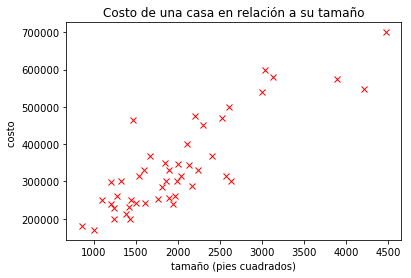

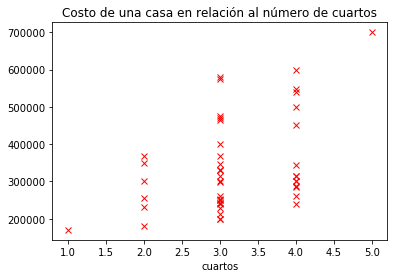

In [64]:
#bloque 11

datos = np.loadtxt('datos/casas_portland.txt', comments='%', delimiter=',')
x, y = datos[:, :-1], datos[:,-1:] 

# T es el número de instancias y n el de atributos
T, n = x.shape
#print(x.shape,y.shape, w.shape)
plt.plot(x[:,0], y, 'rx')
plt.title(u'Costo de una casa en relación a su tamaño')
plt.xlabel(u"tamaño (pies cuadrados)")
plt.ylabel('costo ')

plt.figure()
plt.plot(x[:,1], y, 'rx')
plt.title(u'Costo de una casa en relación al número de cuartos')
plt.xlabel("cuartos")



Antes de realizar el aprendizaje podemos ver que mientras una de las variables se mide en miles de pies cuadrados, la otra variable tiene valores de 1 a 4. Esto es un problema para el algoritmo del descenso de gradiente, por lo que es necesario normalizar los datos (solo para este algoritmo) y que funcione de manera correcta. 

Para normalizar requerimos de dos pasos, por un lado, obtener los valores de medias y desviaciones estandares por atributo, y en segundo lugar, realizar la normalización. Los valores de medias y desviaciones estandares hay que guardarlos, ya que serán necesarios para poder normalizar los datos que se quiera estimar.

**Escribe la función que devuelve los valores de medias t desviaciones estandares.**

In [65]:
#bloque 12

def obtiene_medias_desviaciones(x):
    """
    Obtiene las medias y las desviaciones estandar atributo a atributo.
    
    @param x: un ndarray de dimensión (T, n) donde T es el número de elementos y n el número de atributos
    
    @return: medias, desviaciones donde ambos son ndarrays de dimensiones (n,) con las medias y las desviaciones 
             estandar respectivamente.
    
    """
    # Escribe aqui el código
    
    # T es el número de instancias y n el de atributos
    T, n = x.shape
        
    medias = np.zeros((1,n))
    desviaciones = np.zeros((1,n))    
    for i in range(n):
        medias[0,i] = x[:,i].mean()
        desviaciones[0,i] = x[:,i].std()
    
    return medias, desviaciones
# -----------------------------------------------------------------------------------------------------------------
def normaliza(x, medias, desviaciones):
    """
    Normaliza los datos x

    @param x: un ndarray de dimensión (T, n) donde T es el númro de elementos y n el número de atributos
    @param medias: ndarray de dimensiones (n,) con las medias con las que se normalizará
    @param desviaciones: ndarray de dimensiones (n,) con las desviaciones con las que se normalizará
    
    @return: x_norm un ndarray de las mismas dimensiones de x pero normalizado
    
    """
    return (x - medias) / desviaciones
# -----------------------------------------------------------------------------------------------------------------        

# Y ahora vamos a hacer algo muy simple para probar, que pueden corroborar con el uso de una calculadora común.
x_prueba = np.array([[1, 300],
                    [3, 100],
                    [2, 400],
                    [4, 200]])
m, d = obtiene_medias_desviaciones(x_prueba)

print("Los datos son: \n{}".format(x_prueba))
print("Las medias son: \n{}".format(m))
print("Las desviaciones son: \n{}".format(d))
print("Los datos normalizados son: \n{}".format(normaliza(x_prueba, m, d)))


Los datos son: 
[[  1 300]
 [  3 100]
 [  2 400]
 [  4 200]]
Las medias son: 
[[   2.5  250. ]]
Las desviaciones son: 
[[   1.11803399  111.80339887]]
Los datos normalizados son: 
[[-1.34164079  0.4472136 ]
 [ 0.4472136  -1.34164079]
 [-0.4472136   1.34164079]
 [ 1.34164079 -0.4472136 ]]


Listo, entonces ya podemos hacer descenso de gradiente, o casi. El problema es que no sabemos cual sería el mejor valor para $\epsilon$. Escoge el valor de $\epsilon$ realizando una gráfica de 50 iteraciones solamente para valores desde 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, ... y decide cual de los valores es el que más te conviene.

**Selecciona un valor, especifica aquí cual es, y justifica porque lo seleccionaste.**

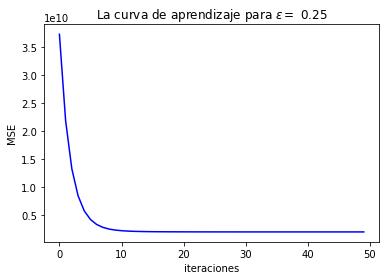

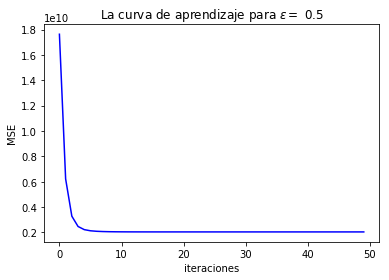

In [66]:
#bloque 13

medias, desviaciones = obtiene_medias_desviaciones(x)

x_norm = np.c_[np.ones((T, 1)), normaliza(x, medias, desviaciones)]

w_ini = np.zeros((n + 1, 1))
num_iters = 50
# ------------------------------------------------
epsilon = 0.25  # Aqui es donde hay que hacer las pruebas

w, mse_hist = descenso_gradiente_lotes(x_norm, y, w_ini, epsilon, num_iters)
plt.figure()
plt.plot(mse_hist, '-b')
plt.title(r"La curva de aprendizaje para $\epsilon =$ " + str(epsilon))

plt.xlabel('iteraciones')
plt.ylabel('MSE')
# ------------------------------------------------
epsilon = 0.5  # Aqui es donde hay que hacer las pruebas

w, mse_hist = descenso_gradiente_lotes(x_norm, y, w_ini, epsilon, num_iters)
plt.figure()
plt.plot(mse_hist, '-b')
plt.title(r"La curva de aprendizaje para $\epsilon =$ " + str(epsilon))
plt.xlabel('iteraciones')
plt.ylabel('MSE')



**Utilizando todo el número de iteraciones necesarias, encuentra el valor de $\omega$ utilizando el descenso de gradiente.**

In [67]:
#bloque 14

epsilon = 0.5
num_iters = 500
w, mse_hist = descenso_gradiente_lotes(x_norm, y, w_ini, epsilon, num_iters)
print(w) 

[[ 340412.65957447]
 [ 109447.79646964]
 [  -6578.35485416]]


**Obten el valor de una casa de 1650 pies cuadrados y 3 recamaras con las thetas obtenidas con el  algoritmo.**

In [68]:
#bloque 15

x = np.zeros((1,2))
x[0,0] = 1650
x[0,1] = 3

x_norm = np.c_[np.ones((1, 1)), normaliza(x, medias, desviaciones)]

y_est = x_norm.dot(w) # aqui uso el w obtenido en la funcion descenso_gradicente_lotes()
print("valor de la casa = ",y_est)


valor de la casa =  [[ 293081.4643349]]
